In [5]:
import glob
import numpy as np
import cv2
import scipy.io
import matplotlib.pyplot as plt

In [6]:
fn_avi = './Aki/MD004_170802.avi'

In [60]:
cap = cv2.VideoCapture(fn_avi)
frame = np.zeros((480,720,3,1000))
for fc in range(0,1000):
    ret, frame[:,:,:,fc] = cap.read()
cap.release()


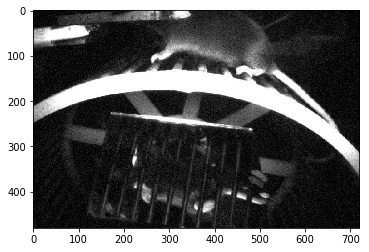

In [9]:
plt.imshow(frame)

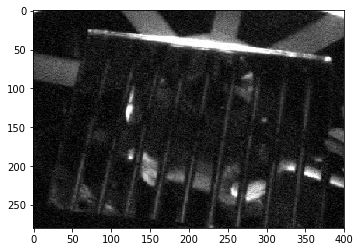

In [10]:
plt.imshow(frame[200:,100:500])

(280, 400)


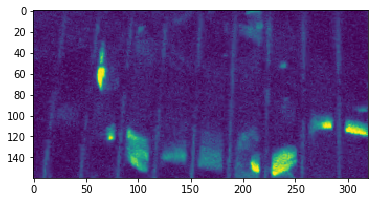

In [78]:
img = frame[200:,100:500,0,0]
print(img.shape)
M = cv2.getRotationMatrix2D((140,200),7,1)
dst = cv2.warpAffine(img, M,(400,280))
plt.imshow(dst[70:230, 50:370])

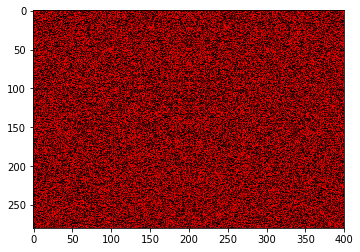

In [12]:
out=np.fft.fft2(frame[200:,100:500])
plt.imshow(np.abs(out))

(array([2.2400e+05, 0.0000e+00, 4.0000e+00, 2.3000e+01, 7.6000e+01,
        2.5400e+02, 7.6000e+02, 2.6250e+03, 7.6600e+03, 1.9766e+04,
        3.3136e+04, 2.5768e+04, 1.0540e+04, 5.5680e+03, 3.3320e+03,
        1.4400e+03, 5.5600e+02, 2.6600e+02, 1.9000e+02, 3.6000e+01]),
 array([ 0.        ,  0.58078222,  1.16156445,  1.74234667,  2.3231289 ,
         2.90391112,  3.48469335,  4.06547557,  4.6462578 ,  5.22704002,
         5.80782225,  6.38860447,  6.9693867 ,  7.55016892,  8.13095115,
         8.71173337,  9.2925156 ,  9.87329782, 10.45408005, 11.03486227,
        11.61564449]),
 <a list of 20 Patch objects>)

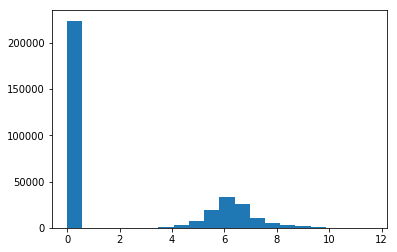

In [24]:
plt.hist(np.log(np.abs(out).flatten()+1),20)

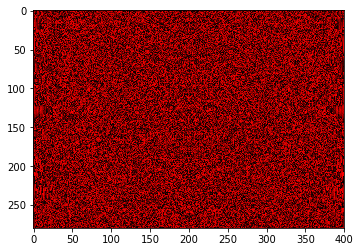

In [27]:
plt.imshow(np.log(np.abs(out)+1),interpolation='none')

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
np.log(np.abs(fshift)+1)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


array([[[3.135, 3.135, 3.135],
        [3.4  , 3.4  , 3.4  ],
        [0.   , 0.   , 0.   ],
        ...,
        [2.398, 2.398, 2.398],
        [1.946, 1.946, 1.946],
        [3.97 , 3.97 , 3.97 ]],

       [[2.773, 2.773, 2.773],
        [2.197, 2.197, 2.197],
        [2.639, 2.639, 2.639],
        ...,
        [3.713, 3.713, 3.713],
        [3.69 , 3.69 , 3.69 ],
        [1.609, 1.609, 1.609]],

       [[3.555, 3.555, 3.555],
        [2.945, 2.945, 2.945],
        [3.135, 3.135, 3.135],
        ...,
        [2.834, 2.834, 2.834],
        [3.135, 3.135, 3.135],
        [2.564, 2.564, 2.564]],

       ...,

       [[2.303, 2.303, 2.303],
        [1.609, 1.609, 1.609],
        [2.484, 2.484, 2.484],
        ...,
        [3.434, 3.434, 3.434],
        [3.465, 3.465, 3.465],
        [3.434, 3.434, 3.434]],

       [[3.295, 3.295, 3.295],
        [2.834, 2.834, 2.834],
        [2.996, 2.996, 2.996],
        ...,
        [2.834, 2.834, 2.834],
        [2.639, 2.639, 2.639],
        [0.   ,

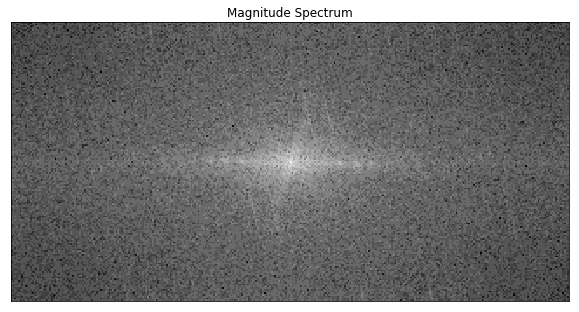

In [80]:
img = frame[200:,100:500,0,0]
M = cv2.getRotationMatrix2D((140,200),7,1)
dst = cv2.warpAffine(img, M,(400,280))
img = dst[70:230, 50:370]
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.log(np.abs(fshift))
plt.figure(figsize=(10,15))
plt.imshow(magnitude_spectrum.astype(np.uint8), cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [63]:
ms = np.zeros((280,400,1000))
for fc in range(0,1000):
    img = frame[200:,100:500,0,fc]
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = np.log(np.abs(fshift))
    ms[:,:,fc] = magnitude_spectrum

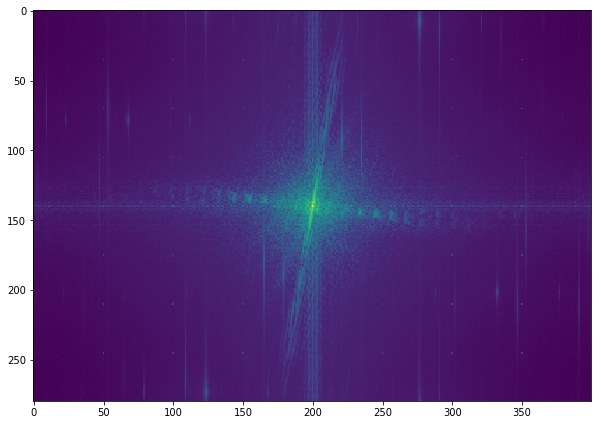

In [66]:

plt.figure(figsize=(10,15))
plt.imshow(np.mean(ms,axis=2))